<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/COMP_4980_Winter_2022_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(200,centers=2, cluster_std=[4,4])

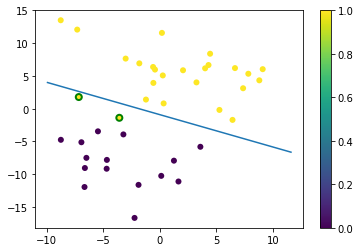

In [ ]:
def dividingLine(x):
  b = clf.intercept_[0]
  w1, w2 = clf.coef_.T
  c = -b/w2
  m = -w1/w2
  return m*x + c

plt.figure()
plt.scatter(X_test[:,0], X_test[:,1],c=y_test, edgecolors='green', linewidths=2*(y_pred!=y_test))
#plt.scatter(X_train[:,0], X_train[:,1],c=y_train)
xp = np.array( [np.min(X_train[:,0]), np.max(X_train[:,0])])
plt.colorbar()
plt.plot(xp, dividingLine(xp))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit( X_train )
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clf = LogisticRegression()
#clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.975

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18,  1],
       [ 0, 21]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
clf.coef_

array([[0.39772762, 0.80415739]])

In [ ]:
clf.intercept_

array([0.73037733])

In [ ]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [ ]:
# rounds sigmoid result to 0 or 1
def predictLabel(x):
  l = len(x)
  pred = np.zeros(l)
  for i in range (l):
    if x[i] > 0.5:
      pred[i] = 1
  
  return pred  

In [ ]:
# Using gradient descent to train our logistic regression model
n = len(X_train)
alpha = 0.1   # learning rate

B = np.zeros(len(X_train[0]) + 1)
ones = np.ones((n,1))
X1 = np.hstack((ones,X_train))

epochs = 1000
costs = np.zeros(epochs)

for i in range(epochs):
  y = X1.dot(B)
  y = sigmoid(y)

  h = predictLabel(y)
  cost = np.sum(((h - y_train)**2)) / (2*n)
  costs[i] = cost

  error = y - y_train
  gradient = X1.T.dot(error) / n
  B = B - alpha*gradient

  if(i % (epochs/20) == 0):
    print(cost.mean())

0.234375
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875
0.021875


In [ ]:
# model coefficients from code here
B

array([0.67962223, 0.41858601, 0.83600581])